1)Convert text file to csv

2)If province is 0 drop the row

3)If deaths, confirmed rows data is null, 
replace with 0

4)Count total drop rows and null value

5)Data visualize with matplotlib (deaths, 
confirmed), histogram or scatter or line chart

6)Manually add data type in the csv file

7)Show location in map using streamlit

8)Push code to a github public repo and share line here

**1)Convert text file to csv**

In [2]:
import pandas as pd
import numpy as np
from google.colab import drive
drive.mount('/content/drive')
file_path = "/content/drive/MyDrive/ADN_DATA/dataset.txt"
Data_Cleaning = "/content/drive/MyDrive/ADN_DATA/cleaned.csv"
data = pd.read_csv(file_path, delimiter=' ')
data.to_csv(Data_Cleaning, index=False)



#df = pd.read_csv(file_path, delimiter='\t')
#Data_Cleaning = "/content/drive/MyDrive/ADN_DATA/dataset.csv"
#df.to_csv(Data_Cleaning, index=False)
#df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**2)If province is 0 drop the row**

In [3]:
data.head(100)
filtered_data = data[data['Province_State'] != '0']
filtered_data.to_csv('/content/drive/MyDrive/ADN_DATA/Cleaned_2.csv', index=False)

In [4]:
#check if there is more 0 valaues in province column
Data_Cleaning_2 = "/content/drive/MyDrive/ADN_DATA/Cleaned_2.csv"

# Read the CSV file into a DataFrame
data = pd.read_csv(Data_Cleaning_2)

# Filter the DataFrame where "Province_State" is equal to '0'
see_data = data[data['Province_State'] == '0']

# Print the filtered DataFrame
print(see_data)

Empty DataFrame
Columns: [Province_State, Country_Region, Lat, Long, Date, Confirmed, Deaths]
Index: []


**3)If deaths, confirmed rows data is null, replace with 0**

In [5]:
data = pd.read_csv('/content/drive/MyDrive/ADN_DATA/cleaned_3.csv')
null_values = data.isnull().sum()
print(null_values)

Province_State    0
Country_Region    0
Lat               0
Long              0
Date              1
Confirmed         0
Deaths            0
dtype: int64


In [6]:
colum_Death = 'Deaths'
colum_Confirmed = 'Confirmed'

data[colum_Death].fillna(0,inplace=True)
data[colum_Confirmed].fillna(0,inplace=True)

Data_Cleaning_3 = "/content/drive/MyDrive/ADN_DATA/cleaned_3.csv"
data.to_csv(Data_Cleaning_3, index=False)

print(data)
#the cleaned_3 is the cleaned the excell fill where the column of death adn confirmed of N/A is 0

       Province_State Country_Region        Lat       Long     Date  \
0             Alabama             US  32.539527 -86.644082  1/22/20   
1             Alabama             US  30.727750 -87.722071  1/22/20   
2             Alabama             US  31.868263 -85.387129  1/22/20   
3             Alabama             US  32.996421 -87.125115  1/22/20   
4             Alabama             US  33.982109 -86.567906  1/22/20   
...               ...            ...        ...        ...      ...   
325423      Tennessee             US  35.973661 -88.451893   7/6/20   
325424      Tennessee             US  36.289691 -82.125890   7/6/20   
325425      Tennessee             US  36.261362 -87.089036   7/6/20   
325426      Tennessee             US  35.425275 -88.609584   7/6/20   
325427      Tennessee             US  36.483191 -83.659473      NaN   

        Confirmed  Deaths  
0             0.0     0.0  
1             0.0     0.0  
2             0.0     0.0  
3             0.0     0.0  
4      

**4)Count total drop rows and null value**

In [7]:
DataSetTXT = "/content/drive/MyDrive/ADN_DATA/dataset.txt"
DataSetCSV = "/content/drive/MyDrive/ADN_DATA/datasetraw.csv"
data = pd.read_csv(DataSetTXT, delimiter=' ')
data.to_csv(DataSetCSV, index=False)

In [8]:


filtered_data_Province = data[data['Province_State']== '0']
filtered_data_Confirmed_Death = data['Confirmed'].isnull().count() + data['Deaths'].isnull().count()

count = filtered_data_Province['Province_State'].count()
print('The number of dropped tables ='+str(count))
print('The number of null values='+str(filtered_data_Confirmed_Death))
#to be continued

The number of dropped tables =9
The number of null values=650874


**5)Data visualize with matplotlib (deaths, confirmed), histogram or scatter or line chart**

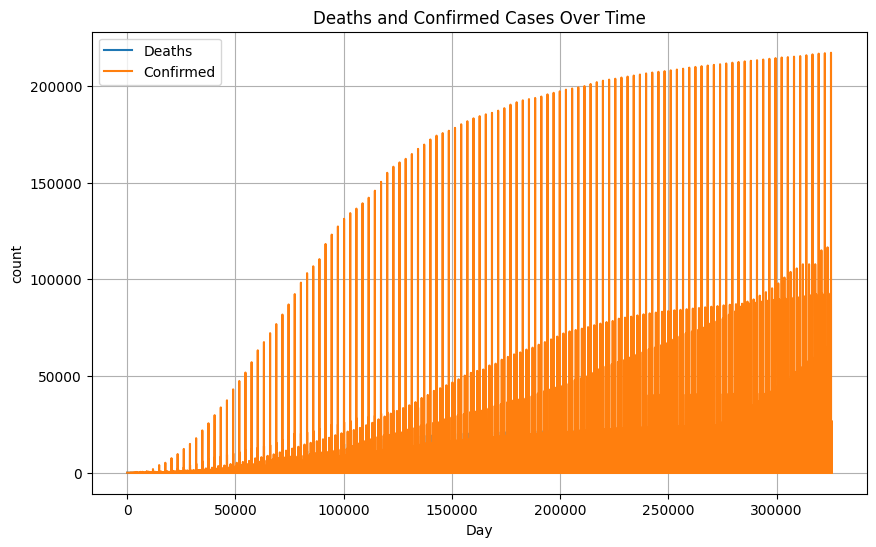

In [9]:
import matplotlib.pyplot as plt

DataSet_3 = pd.read_csv('/content/drive/MyDrive/ADN_DATA/cleaned_3.csv')

plt.figure(figsize=(10,6))
plt.plot(DataSet_3['Deaths'], label='Deaths')
plt.plot(DataSet_3['Confirmed'], label='Confirmed')
plt.xlabel('Day')
plt.ylabel('count')
plt.title('Deaths and Confirmed Cases Over Time')
plt.legend()
plt.grid(True)
plt.show()

**6)Manually add data type in the csv file**

In [10]:
import pandas as pd

# Define a custom date parsing function
def custom_date_parser(date_string):
    return pd.to_datetime(date_string, format='%m/%d/%y')

Page_Source = '/content/drive/MyDrive/ADN_DATA/cleaned_4.csv'

# Read the CSV file with specified data types and date format
formated_Data = pd.read_csv(Page_Source, header=0, dtype={
    'Province_State': str,
    'Country_Region': str,
    'Lat': float,
    'Long': float,
}, parse_dates=['Date'], date_parser=custom_date_parser)

# Access the data with specified data types and date format
print(formated_Data.dtypes)
print(formated_Data.head())


Province_State            object
Country_Region            object
Lat                      float64
Long                     float64
Date              datetime64[ns]
Confirmed                float64
Deaths                   float64
dtype: object
  Province_State Country_Region        Lat       Long       Date  Confirmed  \
0        Alabama             US  32.539527 -86.644082 2020-01-22        0.0   
1        Alabama             US  30.727750 -87.722071 2020-01-22        0.0   
2        Alabama             US  31.868263 -85.387129 2020-01-22        0.0   
3        Alabama             US  32.996421 -87.125115 2020-01-22        0.0   
4        Alabama             US  33.982109 -86.567906 2020-01-22        0.0   

   Deaths  
0     0.0  
1     0.0  
2     0.0  
3     0.0  
4     0.0  


In [11]:

Final = "/content/drive/MyDrive/ADN_DATA/Final.csv"
formated_Data.to_csv(Final, index=False)



In [12]:
perse_vai = pd.read_csv("/content/drive/MyDrive/ADN_DATA/Final.csv")

# Access the data with specified data types and date format
print(perse_vai.dtypes)
print(perse_vai.head())

Province_State     object
Country_Region     object
Lat               float64
Long              float64
Date               object
Confirmed         float64
Deaths            float64
dtype: object
  Province_State Country_Region        Lat       Long        Date  Confirmed  \
0        Alabama             US  32.539527 -86.644082  2020-01-22        0.0   
1        Alabama             US  30.727750 -87.722071  2020-01-22        0.0   
2        Alabama             US  31.868263 -85.387129  2020-01-22        0.0   
3        Alabama             US  32.996421 -87.125115  2020-01-22        0.0   
4        Alabama             US  33.982109 -86.567906  2020-01-22        0.0   

   Deaths  
0     0.0  
1     0.0  
2     0.0  
3     0.0  
4     0.0  


**7)Show location in map using streamlit**

In [13]:
pip install streamlit folium

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [14]:
!pip install streamlit folium pandas pyngrok==4.1.1

import streamlit as st
import folium
import pandas as pd
from pyngrok import ngrok

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
def main():
    # Set the page title
    st.title("Location Map")

    # Read the location data from a CSV file
    df = pd.read_csv(Final)

    # Create a map object
    m = folium.Map()

    # Add markers for each location
    for index, row in df.iterrows():
        folium.Marker([row['Lat'], row['Long']], popup=row['Province_State']).add_to(m)

    # Generate the HTML string representation of the map
    m = m._repr_html_()

    # Display the map using Streamlit
    st.markdown(m, unsafe_allow_html=True)

if __name__ == '__main__':
    main()
    url = ngrok.connect(port='8501')
    print('Streamlit app URL:', url)

2023-05-24 11:59:57.878 
  command:

    streamlit run /usr/local/lib/python3.10/dist-packages/ipykernel_launcher.py [ARGUMENTS]
